In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
import scipy.ndimage as ndi
from matplotlib.colors import ListedColormap

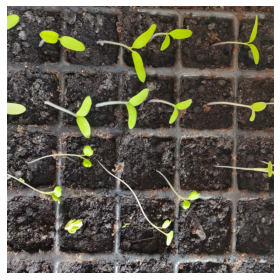

In [2]:
# load the images seedling1 and 2 from the exampleIMages folder
#seedling1 = plt.imread('creative_common_license_images/6190356198_381bd2cc01_b.jpg')
seedling1 = plt.imread('exampleImages/closeup.jpg')
# reduce the size to 1/4 of the original
# use interpolation to smooth the image
#seedling1 = ndi.zoom(seedling1, (0.25, 0.25, 1), order=1)

# smooth the image
#sigma = 1.0
#seedling1 = ndi.gaussian_filter(seedling1, sigma=(sigma, sigma, 0))
# remve the alpha channel
seedling1 = seedling1[:,:,:3]

# display the image
plt.imshow(seedling1)

plt.axis('off')
# remove empty space around the image
plt.tight_layout()
# completely remove the space
plt.margins(0)


#plt.savefig(f'figures/Seedlings.jpg', dpi = 200,bbox_inches='tight')
plt.show()

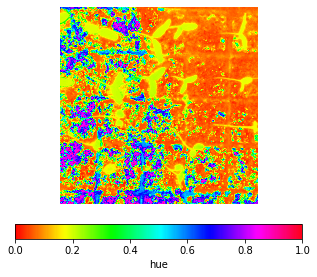

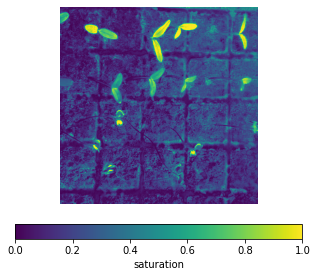

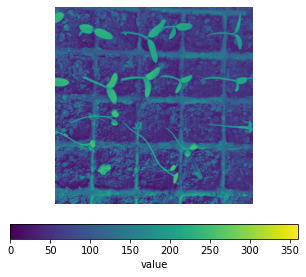

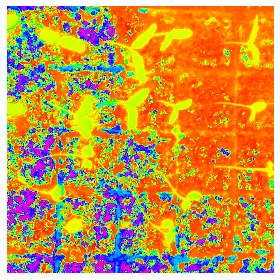

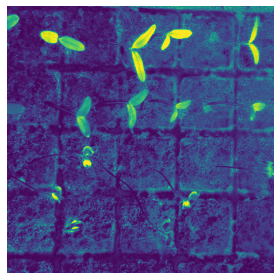

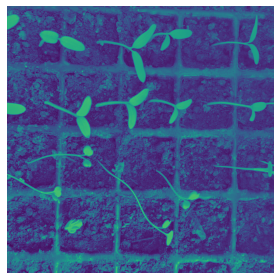

In [3]:
# grab hsv values from the image
hsv = colors.rgb_to_hsv(seedling1)

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

# save the images to the fugures folder
# use a colorbar, to visualize the values

titles = ["hue", "saturation", "value"]
images = [h, s, v]

for i in range(3):
    # Create subplots
    fig, ax = plt.subplots()
    
    # use pcolor
    if i == 0:
        im = ax.imshow(images[i], cmap='hsv', vmin=0, vmax=1)
    elif i == 2:
        im = ax.imshow(images[i], vmin=0, vmax=360)
    else:
        im = ax.imshow(images[i], vmin=0, vmax=1)
    
    # Add colorbar with shrink parameter
    cbar = fig.colorbar(im, orientation="horizontal", ax=ax, pad=0.08, shrink=0.7)
    cbar.set_label(titles[i])
    
    #remove text
    plt.axis('off')

    # Tight layout
    plt.tight_layout()
    plt.margins(0)
    # Save figure
    #plt.savefig(f'figures/seedling1_{titles[i]}.png', dpi=200,bbox_inches='tight')
    
    # Show plot
    plt.show()

# also save it without the colorbar
    
for i in range(3):
    # use pcolor
    plt.figure()
    if i == 0:
        plt.imshow(images[i], cmap='hsv', vmin=0, vmax=1)
    elif i == 2:
        plt.imshow(images[i], vmin=0, vmax=360)
    else:
        plt.imshow(images[i], vmin=0, vmax=1)
        # make the colorbar smaller than the image height

    #plt.title(titles[i])
    plt.axis('off')
    # remove empty space around the image
    plt.tight_layout()
    # completely remove the space
    plt.margins(0)


    #plt.savefig(f'figures/seedling1_{titles[i]}_no_colorbar.png', dpi = 200,bbox_inches='tight')
    plt.show()

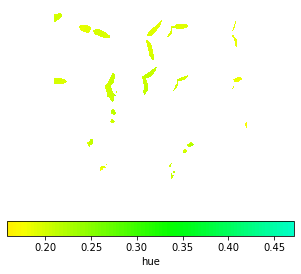

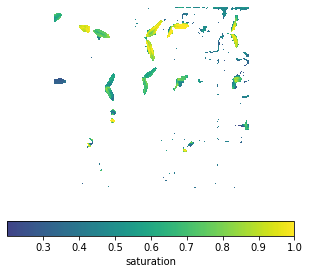

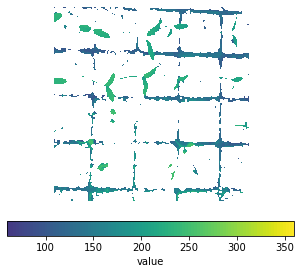

In [4]:
threshold_h_lower = 57/360
threshold_h_upper = 170/360
threshold_s_lower = 0.20
threshold_s_upper = 1.0
threshold_v_lower = 60
threshold_v_upper = 360 

# display the same 3 images but apply the thresholds

# hue, apply the thresholds
fig, ax = plt.subplots()

h_masked = np.ma.masked_where((h < threshold_h_lower) | (h > threshold_h_upper), h)
# make nan black
cmap = plt.cm.hsv
cmap = ListedColormap(cmap(np.linspace(threshold_h_lower, threshold_h_upper, 256)))
im = ax.imshow(h_masked, cmap=cmap)

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, pad=0.08, shrink=0.7)
    
cbar.set_label('hue')

plt.tight_layout()
plt.axis('off')
#plt.savefig('figures/seedling1_hue_masked.png', dpi = 200,bbox_inches='tight')


# saturation, apply the thresholds
fig, ax = plt.subplots()
s_masked = np.ma.masked_where((s < threshold_s_lower) | (s > threshold_s_upper), s)
# make a new color map only in the valid range of the hue
cmap = plt.cm.viridis
cmap = ListedColormap(cmap(np.linspace(threshold_s_lower, threshold_s_upper, 256)))
im = ax.imshow(s_masked, cmap=cmap)
cbar = fig.colorbar(im, orientation="horizontal", ax=ax, pad=0.08, shrink=0.7)
cbar.set_label('saturation')

plt.tight_layout()
plt.axis('off')
#plt.savefig('figures/seedling1_saturation_masked.png', dpi = 200,bbox_inches='tight')


# value, apply the thresholds
fig, ax = plt.subplots()
# only apply the threshold to the value
v_masked = np.ma.masked_where((v < threshold_v_lower) | (v > threshold_v_upper), v)

# make a new color map only in the valid range of the hue
cmap = plt.cm.viridis
cmap = ListedColormap(cmap(np.linspace(threshold_v_lower/360, threshold_v_upper/360, 100)))
im = ax.imshow(v_masked, cmap=cmap, vmin= threshold_v_lower, vmax=threshold_v_upper)

cbar = fig.colorbar(im, orientation="horizontal", ax=ax, pad=0.08, shrink=0.7)
cbar.set_label('value')

plt.tight_layout()
plt.axis('off')
#plt.savefig('figures/seedling1_value_masked.png', dpi = 200,bbox_inches='tight')
plt.show()


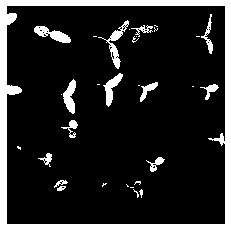

In [5]:
# succesifly apply the thresholds to the image

# create a mask for the hue
h_mask = (h > threshold_h_lower) & (h < threshold_h_upper)
v_mask = (v > threshold_v_lower) & (v < threshold_v_upper)
s_mask = (s > threshold_s_lower) & (s < threshold_s_upper)

# combine the masks successively
plt.figure()
mask = h_mask & v_mask & s_mask
# true is white, false is black
plt.imshow(mask, cmap='gray', interpolation='none')

plt.axis('off')
#plt.savefig('figures/seedling1_mask.png', dpi = 200,bbox_inches='tight')
plt.show()



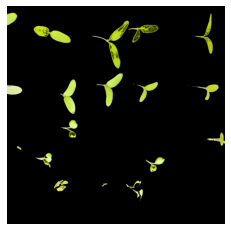

In [6]:
# apply this mask to the original image, black out the false values

plt.figure()
seedling1_masked = np.copy(seedling1)
seedling1_masked[~mask] = 0
plt.imshow(seedling1_masked)
plt.axis('off')
#plt.savefig('figures/seedling1_masked.png', dpi = 200,bbox_inches='tight')
plt.show()


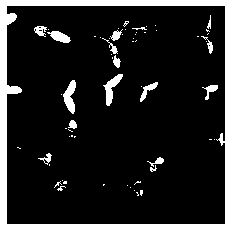

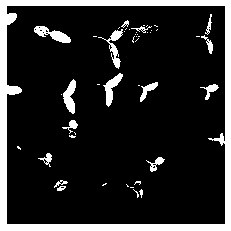

(-0.5, 1999.5, 2000.5, -0.5)

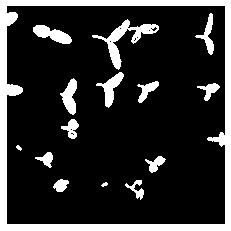

In [7]:
# dilate and erode the mask to remove small holes and small islands

dilation_iterations = 12
erosion_iterations = 2

# first errode the mask to remove small islands
mask_eroded = ndi.binary_erosion(mask, iterations=erosion_iterations)

# display thhe new mask after erosion
plt.figure()
plt.imshow(mask_eroded, cmap='gray', interpolation='none')
plt.axis('off')
#plt.savefig('figures/seedling1_mask_eroded.png', dpi = 200,bbox_inches='tight')
plt.show()

# display the new mask after dilation
mask_dilated = ndi.binary_dilation(mask_eroded, iterations=erosion_iterations)
plt.figure()
plt.imshow(mask_dilated, cmap='gray', interpolation='none')
plt.axis('off')
#plt.savefig('figures/seedling1_mask_dilated_equally as erroded.png', dpi = 200,bbox_inches='tight')
plt.show()

# dilate more to connect islands
mask_dilated = ndi.binary_dilation(mask_dilated, iterations=dilation_iterations - erosion_iterations)

# display the new mask after erosion
plt.figure()
plt.imshow(mask_dilated, cmap='gray', interpolation='none')
plt.axis('off')
#plt.savefig('figures/seedling1_mask_eroded_more.png', dpi = 200,bbox_inches='tight')


(-0.5, 1999.5, 2000.5, -0.5)

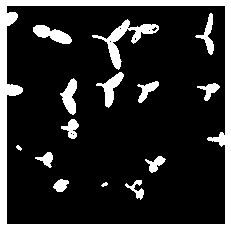

In [8]:
# perform closing to that such that the mask is closed

new_mask = ndi.binary_closing(mask_dilated, iterations=3)

# display the new mask after closing
plt.figure()
plt.imshow(new_mask, cmap='gray', interpolation='none')
plt.axis('off')


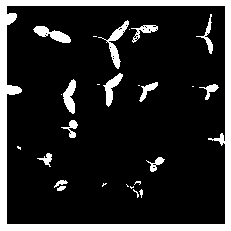

In [9]:
# try the same with closing
mask_closing = ndi.binary_closing(mask, iterations=erosion_iterations)
plt.figure()
plt.imshow(mask_closing, cmap='gray', interpolation='none')
plt.axis('off')
#plt.savefig('figures/seedling1_mask_closing_why_argument_for_closing.png', dpi = 200,bbox_inches='tight')
plt.show()


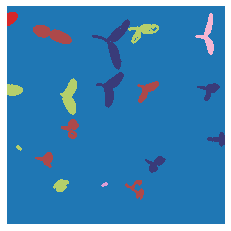

18

In [10]:
#ndi.label(mask_dilated)
# label the connected components
mask_labeled, num_labels = ndi.label(mask_dilated)

# display the labeled mask
plt.figure()
# combine tab20a and tab20b to get 40 colors
cmapa = plt.cm.tab20
cmapb = plt.cm.tab20b


cmap = np.vstack((cmapa(np.linspace(0, 1, 20)), cmapb(np.linspace(0, 1, 20))))
cmap = np.vstack((cmap, cmapb(np.linspace(0, 1, 20))))
cmap = np.vstack((cmap, cmapb(np.linspace(0, 1, 20))))
cmap = np.vstack((cmap, cmapb(np.linspace(0, 1, 20))))
cmap = np.vstack((cmap, cmapb(np.linspace(0, 1, 20))))

tab_40 = ListedColormap(cmap)

plt.imshow(mask_labeled, cmap=tab_40, interpolation='none')
plt.axis('off')
#plt.savefig('figures/seedling1_mask_labeled.png', dpi = 200,bbox_inches='tight')
plt.show()

mask_labeled.max()

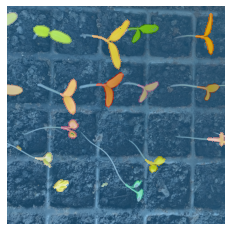

In [11]:
# display the original image with the labeled mask
plt.figure()
plt.imshow(seedling1)
plt.imshow(mask_labeled, cmap='tab20', interpolation='none', alpha=0.5)
plt.axis('off')
#plt.savefig('figures/seedling1_mask_labeled_on_image.png', dpi = 200,bbox_inches='tight')
plt.show()


<ipython-input-12-2dc90b613bea>:9: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  center = ndi.measurements.center_of_mass(mask_labeled == i)


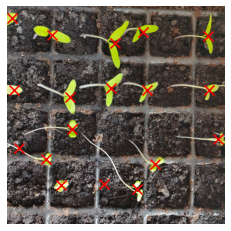

In [12]:
# find the areas of the initial mask inside the labeled mask and display them as x on the image
plt.figure()
plt.imshow(seedling1)
for i in range(1, num_labels + 1):
    # find the area of the mask
    area = np.sum(mask_labeled == i)
    if area > 0:
        # find the center of mass of the mask
        center = ndi.measurements.center_of_mass(mask_labeled == i)
        plt.scatter(center[1], center[0], s=100, c='r', marker='x')
plt.axis('off')
#plt.savefig('figures/seedling1_mask_labeled_on_image_with_x.png', dpi = 200,bbox_inches='tight')
plt.show()

